# TITANIC SURVIVAL PREDICTION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,KFold 
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

#### Loading the Dataset

In [13]:
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\codsoft\Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
df.shape

(418, 12)

#### Understanding and Pre-Processing the Data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Data Cleaning

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
df["Cabin"][df["Cabin"].isnull()==False] = "Cabin Avbl"

In [18]:
df["Cabin"].unique()

array([nan, 'Cabin Avbl'], dtype=object)

In [19]:
df["Cabin"].fillna("Not Avbl",inplace=True)

In [20]:
pd.crosstab(df["Cabin"], df["Survived"])

Survived,0,1
Cabin,,
Cabin Avbl,47,44
Not Avbl,219,108


In [21]:
df["Name"] = df["Name"].str.split(".").apply(lambda x: x[0].split(",")[1]).str.strip(" ")

In [22]:
df["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [23]:
df["Age"] = df.groupby("Name")["Age"].apply(lambda x: x.fillna(x.median()))

In [24]:
df["Name"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [26]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [28]:
df["Family"] = df["SibSp"]+df["Parch"]+1

In [29]:
def family(x):
    if x>3:
        return("Large")
    elif x>2:
        return("Small")
    elif x>1:
        return("Doubles")
    else:
        return("Singles")

In [30]:
df["Family"] = df["Family"].apply(family)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,0,3,Mr,male,34.5,0,0,330911,7.8292,Not Avbl,Q,Singles
1,893,1,3,Mrs,female,47.0,1,0,363272,7.0000,Not Avbl,S,Doubles
2,894,0,2,Mr,male,62.0,0,0,240276,9.6875,Not Avbl,Q,Singles
3,895,0,3,Mr,male,27.0,0,0,315154,8.6625,Not Avbl,S,Singles
4,896,1,3,Mrs,female,22.0,1,1,3101298,12.2875,Not Avbl,S,Small


In [32]:
df["Fare"] = df.groupby("Family")["Fare"].apply(lambda x: x.fillna(x.median()))

In [33]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Family         0
dtype: int64

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,0,3,Mr,male,34.5,0,0,330911,7.8292,Not Avbl,Q,Singles
1,893,1,3,Mrs,female,47.0,1,0,363272,7.0000,Not Avbl,S,Doubles
2,894,0,2,Mr,male,62.0,0,0,240276,9.6875,Not Avbl,Q,Singles
3,895,0,3,Mr,male,27.0,0,0,315154,8.6625,Not Avbl,S,Singles
4,896,1,3,Mrs,female,22.0,1,1,3101298,12.2875,Not Avbl,S,Small


In [35]:
df_new=df.drop(["PassengerId" ,"Name","SibSp","Parch","Ticket"],axis=1)

In [37]:
df_new.shape

(418, 8)

In [39]:
sex_n= {'male': 0, 'female': 1}
df_new['Sex'] = df_new['Sex'].replace(sex_n)

In [42]:
cabin_n= {'Cabin Avbl': 1, 'Not Avbl': 0}
df_new['Cabin'] = df_new['Cabin'].replace(cabin_n)

In [44]:
Embarked_n = {'S': 1, 'C': 2, 'Q': 3}
df_new['Embarked'] = df_new['Embarked'].replace(Embarked_n)

In [46]:
family = {"Singles":1,"Doubles":2,"Small":3,"Large":4}
df_new["Family"] = df_new["Family"].replace(family)

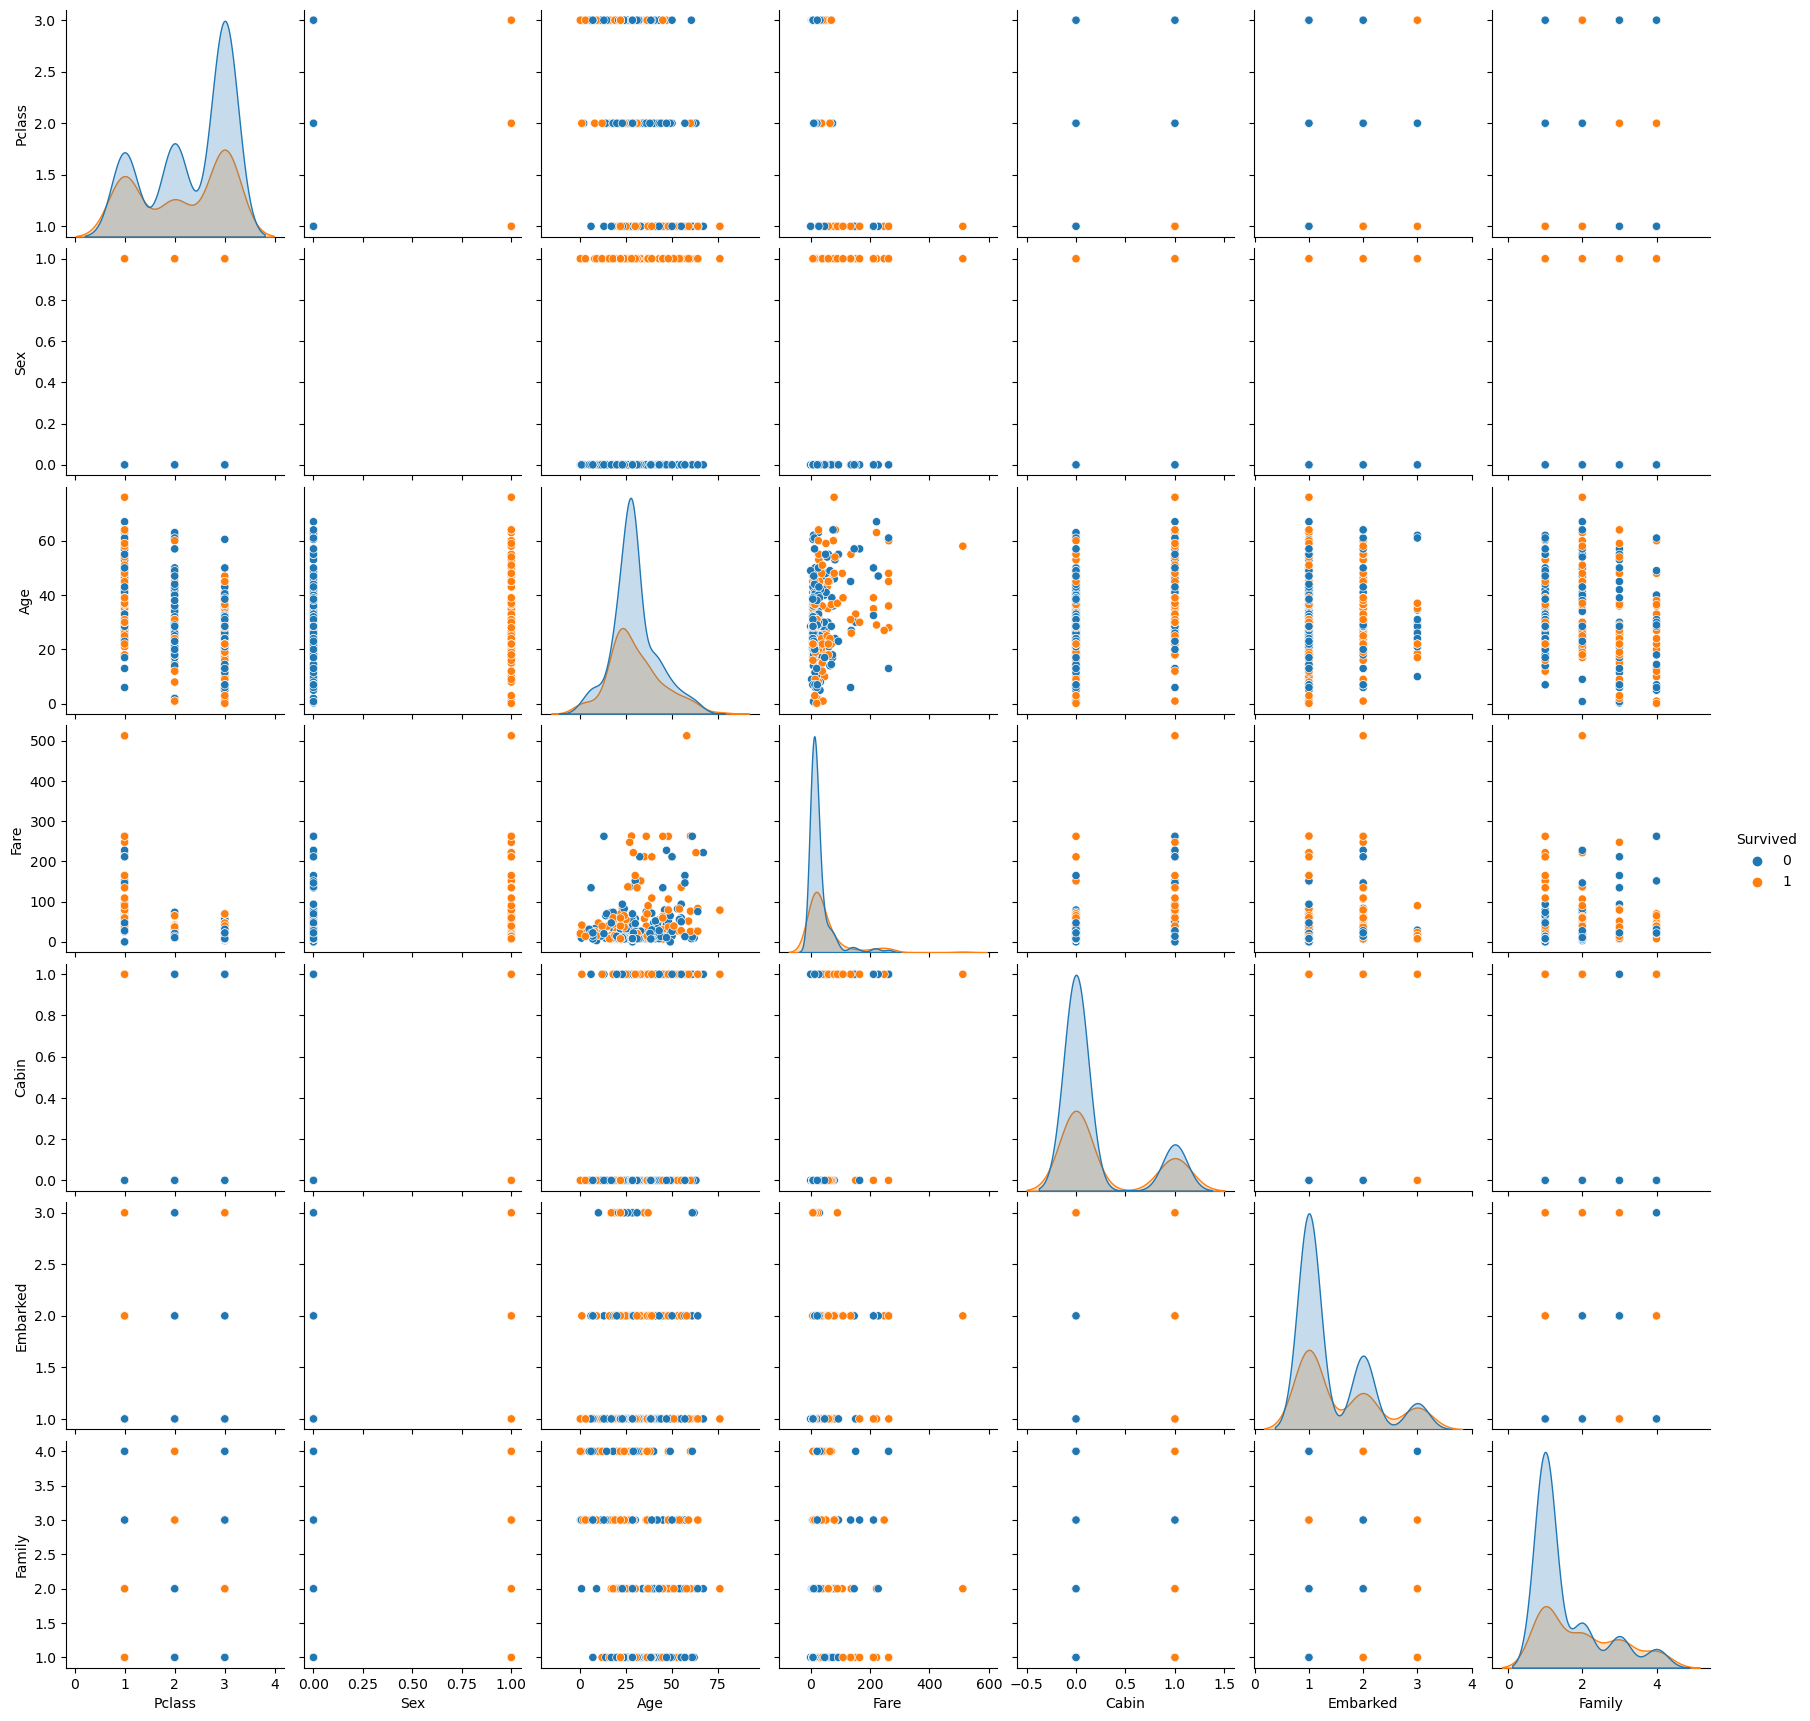

In [47]:
sns.pairplot(df_new, hue='Survived')
plt.show()

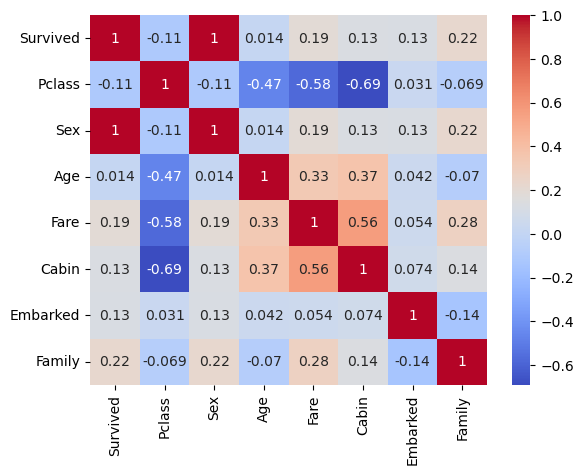

In [48]:
sns.heatmap(df_new.corr(),annot=True, cmap='coolwarm')
plt.show()

### Train And Test

In [50]:
x = df_new.drop("Survived",axis=1)
y = df_new["Survived"]

## Standard Scaler

In [52]:
sc = StandardScaler()
x[["Age","Fare"]] = sc.fit_transform(x[["Age","Fare"]])

In [53]:
x

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,0,0.372489,-0.497079,0,3,1
1,3,1,1.337655,-0.511942,0,1,2
2,2,0,2.495853,-0.463770,0,3,1
3,3,0,-0.206610,-0.482143,0,1,1
4,3,1,-0.592676,-0.417167,0,1,3
...,...,...,...,...,...,...,...
413,3,0,-0.090790,-0.493121,0,1,1
414,1,1,0.719949,1.314552,1,2,1
415,3,0,0.681342,-0.507461,0,1,1
416,3,0,-0.090790,-0.493121,0,1,1


In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((292, 7), (126, 7), (292,), (126,))

In [56]:
model_score = pd.DataFrame(columns=["Model","Accuracy","F1 Score","Precision","Recall"])

In [57]:
def score_calculator(model,ytest,ypred):
    global model_score
    acc = accuracy_score(ytest,ypred)
    f1 = f1_score(ytest,ypred,)
    pres = precision_score(ytest,ypred)
    recall = recall_score(ytest,ypred)
    model_score = model_score.append({"Model":model,"Accuracy":acc,"F1 Score":f1,"Precision":pres,"Recall":recall},
                                     ignore_index=True)
    return model_score

### Logistic Regression

In [58]:
lr = LogisticRegression(random_state=10)
lr.fit(xtrain,ytrain)

LogisticRegression(random_state=10)

In [59]:
ypred_lr = lr.predict(xtest)

In [60]:
score_calculator("Logistic Regression",ytest,ypred_lr)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,1.0,1.0,1.0,1.0


##### Logistic Regression itself giving 1 accuracy. So other models will also give better metrics. So we conclude with this.